In [2]:
import pdfplumber
from collections import defaultdict

In [3]:
pdf_path = "1. 최종보고서.pdf"
pdf = pdfplumber.open(pdf_path)

In [4]:
pages = pdf.pages

In [5]:
page = pages[9]

In [6]:
table_settings = {
    "vertical_strategy": "lines",       # 세로 기준선으로 테이블 감지
    "horizontal_strategy": "lines",     # 가로 기준선으로 테이블 감지
    "snap_tolerance": 6,                # 테두리 감지 허용 오차
    "join_tolerance": 5                 # 테두리 합병 허용 오차
}

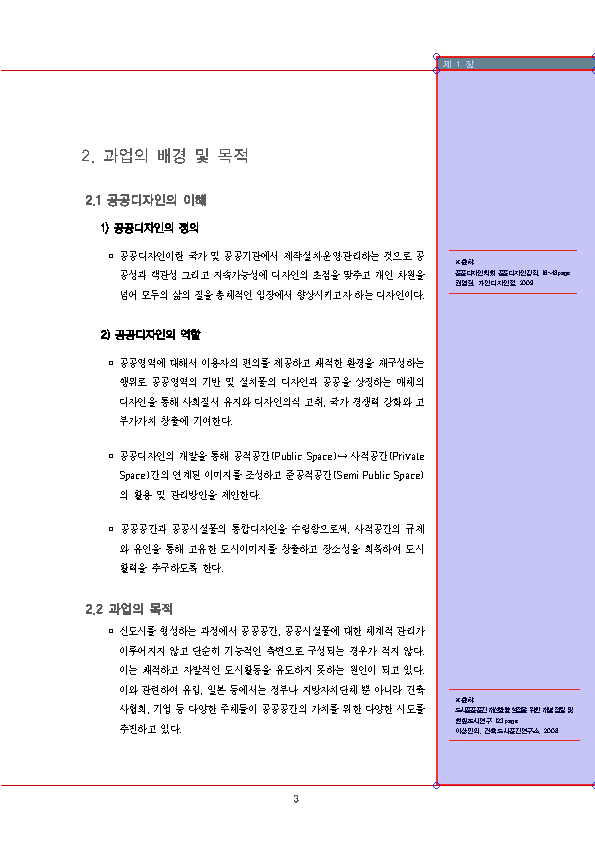

In [7]:
page.to_image().debug_tablefinder(table_settings)

In [108]:
page = pages[11]

In [109]:
tables = page.find_tables()

In [110]:
print(tables[0].extract())

[['제 1 장'], ['과업의 개요']]


In [111]:
tables

In [93]:
for table in tables:
    page = page.outside_bbox(table.bbox)

In [98]:
tables

In [74]:
out_page = page.outside_bbox(tables[0].bbox)

IndexError: list index out of range

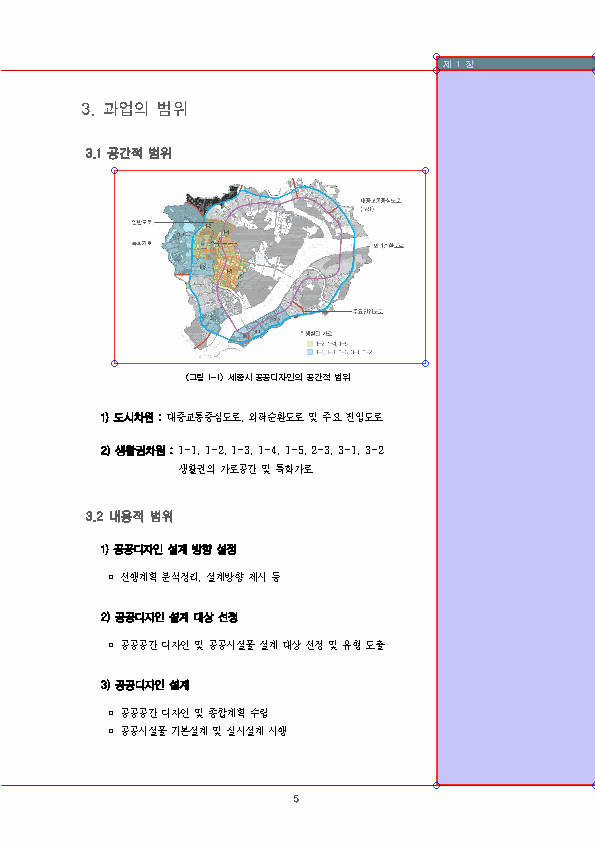

In [107]:
page.to_image().debug_tablefinder()

In [72]:
lines = page.extract_text_lines()

In [73]:
for line in lines:
    print(line['text'])

과업의 개요
2. 과업의 배경 및 목적
2.1 공공디자인의 이해
1) 공공디자인의 정의
◦ 공공디자인이란 국가 및 공공기관에서 제작․설치․운영․관리하는 것으로 공
※출처:
공성과 객관성 그리고 지속가능성에 디자인의 초점을 맞추고 개인 차원을 공공디자인학회 공공디자인강좌, 16~18page
권영걸, 가인디자인랩. 2009
넘어 모두의 삶의 질을 총체적인 입장에서 향상시키고자 하는 디자인이다.
2) 공공디자인의 역할
◦ 공공영역에 대해서 이용자의 편의를 제공하고 쾌적한 환경을 재구성하는
행위로 공공영역의 기반 및 설치물의 디자인과 공공을 상징하는 매체의
디자인을 통해 사회질서 유지와 디자인의식 고취, 국가 경쟁력 강화와 고
부가가치 창출에 기여한다.
◦ 공공디자인의 개발을 통해 공적공간(Public Space)↔ 사적공간(Private
Space)간의 연계된 이미지를 조성하고 준공적공간(Semi Public Space)
의 활용 및 관리방안을 제안한다.
◦ 공공공간과 공공시설물의 통합디자인을 수립함으로써, 사적공간의 규제
와 유인을 통해 고유한 도시이미지를 창출하고 장소성을 회복하여 도시
활력을 추구하도록 한다.
2.2 과업의 목적
◦ 신도시를 형성하는 과정에서 공공공간, 공공시설물에 대한 체계적 관리가
이루어지지 않고 단순히 기능적인 측면으로 구성되는 경우가 적지 않다.
이는 쾌적하고 자발적인 도시활동을 유도하지 못하는 원인이 되고 있다.
이와 관련하여 유럽, 일본 등에서는 정부나 지방자치단체 뿐 아니라 건축
※출처:
사협회, 기업 등 다양한 주체들이 공공공간의 가치를 위한 다양한 시도를
도시공공공간 개선방향 설정을 위한 개념 정립 및
현황조사연구 123page
추진하고 있다.
이상민외, 건축도시공간연구소. 2008


In [39]:
lines = page.outside_bbox(table_box).extract_text_lines()

In [40]:
lines = page.extract_text_lines()

In [26]:
lines[7]['text']

'공성과 객관성 그리고 지속가능성에 디자인의 초점을 맞추고 개인 차원을 공공디자인학회 공공디자인강좌, 16~18page'

- bbox 크기 찾고, line이 top, bottom 사이에 잇을 시 x0, x1 확인하여 box 안에 있을 내용들은 제거, 그리고 box가 시작하는 top부분에 table의 extract 내용 삽입
- table_box의 top보다 낮은 첫번째일때 무조건 table을 삽입, 

In [15]:
def convert_markdown_table(table):
    """
    table 내용이 담긴 2중 list를 받아 마크다운 테이블 형식으로 return

    :param table: table 내용이 담긴 2중
    :return: 마크다운 테이블 포맷의 txt
    """
    rows = []
    for idx, row in enumerate(table):
        rows.append('| ' + ' | '.join(map(str, row)).replace('\n', '').replace('None', '') + ' |')
        if idx == 0:
            rows.append('| ' + ' | '.join(['---'] * len(row)) + ' |')
    return '\n' + '\n'.join(rows) + '\n'

In [28]:
def which_text(table_box, text_box):
    table_x0, table_top, table_x1, table_bottom = table_box
    text_x0, text_top, text_x1, text_bottom = text_box
    if table_top >= text_top and table_bottom >= text_bottom:
        if table_x0 >= text_x0 and table_x1 >= text_x1:
            return 'table_text'
        else:
            return 'complex_text'
    elif table_top < text_top:
        return 'table_passed'
    else:
        return 'pure_text'

In [ ]:
def handling_complex_text(table_box, chars):
    table_x0, table_top, table_x1, table_bottom = table_box
    result_txt = ''
    for char in chars:
        char_x0 = char['x0']
        char_x1 = char['x1']
        
        
    

In [24]:
lines = page.extract_text_lines()
tables = page.find_tables()
result_txt = ''

In [25]:
table_lst = []
for table in tables:
    table_box = table.bbox
    table_lst.append((table_box, convert_markdown_table(table.extract())))
    

In [1]:
table_lst

NameError: name 'table_lst' is not defined

In [26]:
flag = 0
for line in lines:
    if len(table_lst) > 1:
        table_box = table_lst[0][0]
        text_box = (line['x0'], line['top'], line['x1'], line['bottom'])
        text_category = which_text(table_box, text_box)
        if text_category == 'table_text':
            if flag == 0:
                result_txt += table_lst[0][1]
                table_lst.pop(0)
                flag = 1
        elif text_category == 'complex_text':
            if flag == 0:
                result_txt += table_lst[0][1]
                result_txt += handling_complex_text(table_box, line['chars'])
                table_lst.pop(0)
                flag = 1
            else:
                result_txt += handling_complex_text(table_box, line['chars'])
        elif text_category == 'table_passed':
            result_txt += table_lst[0][1]
            result_txt += line['text']
            table_lst.pop(0)
            flag = 0
        else:
            flag = 0
            result_txt += line['text']
    else:
        result_txt += line['text']

            
            
        

SyntaxError: incomplete input (1147338969.py, line 2)

In [ ]:
(10, 0, 20, 10) 

In [58]:
pdf_path = "1. 최종보고서.pdf"
pdf = pdfplumber.open(pdf_path)
pages = pdf.pages

In [59]:
page = pages[44]

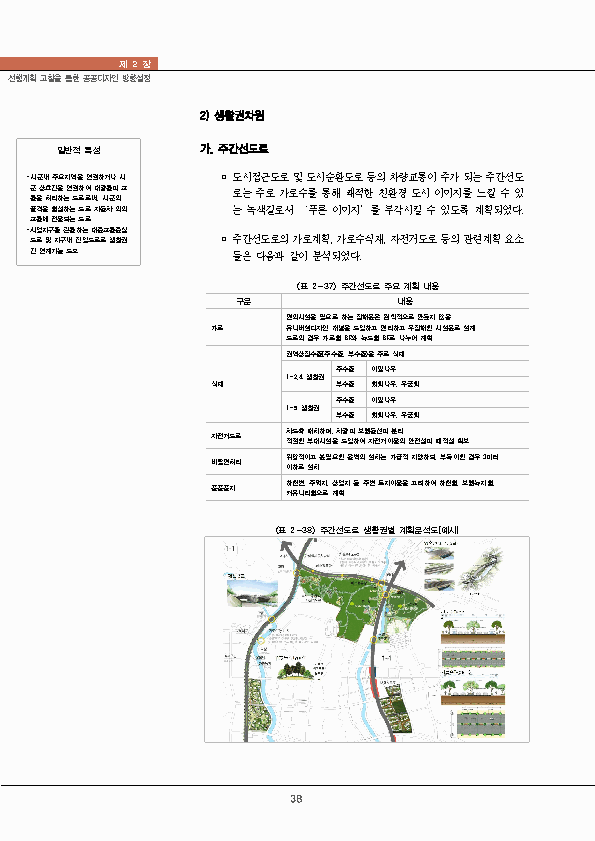

In [60]:
page.to_image()

In [63]:
page = page.within_bbox((0, 70, page.width, page.height - 60))

In [64]:
tables = page.find_tables()

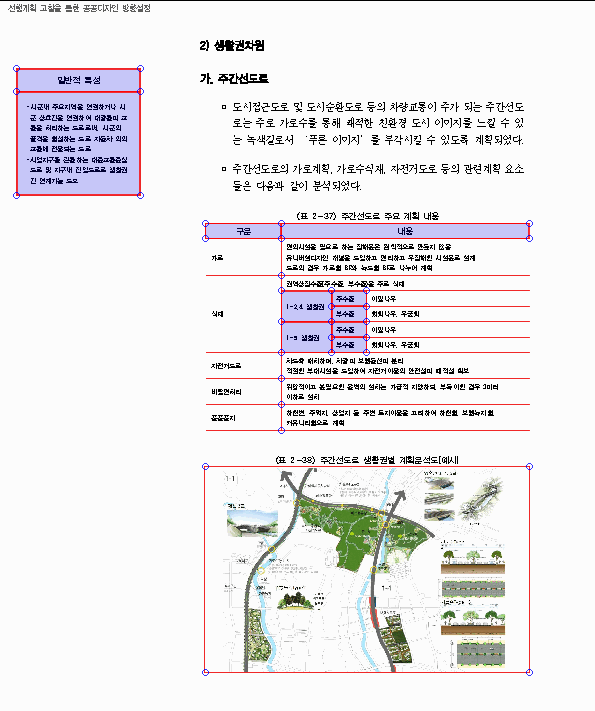

In [65]:
page.to_image().debug_tablefinder()

In [67]:
for i in tables:
    print(i.extract())

[['일반적 특성'], ['\uf000시․군내 주요지역을 연결하거나 시․\n군 상호간을 연결하여 대량통과 교\n통을 처리하는 도로로써, 시․군의\n골격을 형성하는 도로 자동차 외의\n교통에 전용되는 도로\n\uf000사업지구를 관통하는 대중교통중심\n도로 및 지구내 진입도로로 생활권\n간 연계기능 도모']]
[['구분', '내용']]
[['1\xad2,4 생활권', '주수종'], [None, '부수종'], ['1\xad5 생활권', '주수종'], [None, '부수종']]


In [66]:
table_boxes = [table.bbox for table in tables]

3

In [ ]:
0, 0, 10, 10
x0 top x1 bottom

In [26]:
table_boxes[0]

(16.911, 138.808, 140.325, 265.03)

In [37]:
boxes = [(0, 70, page.width, page.height-60)]

In [75]:
result[0]

(0, 0, 595, 785.141)